<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_15_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


In [ ]:
import numpy as np
x = np.empty([4,2]) # empty는 메모리 남아있는게 그냥 나오는것(비어있는게 아니다.)
x

array([[1.79602427e-316, 6.79038653e-313],
       [2.37663529e-312, 2.14321575e-312],
       [2.37663529e-312, 2.56761491e-312],
       [0.00000000e+000, 0.00000000e+000]])

In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

In [ ]:
x = torch.empty(4,2)
x

tensor([[2.0670e-34, 0.0000e+00],
        [3.5032e-44, 0.0000e+00],
        [       nan, 6.4460e-44],
        [1.1578e+27, 7.1463e+22]])

In [ ]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2) ## 0~1 사이의 숫자를 균등하게 생성
x

tensor([[0.2459, 0.0314],
        [0.7641, 0.4225],
        [0.1540, 0.6110],
        [0.0845, 0.4893]])

< 텐서의 데이터 타입 >

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
# 데이터 타입(dtype)이 long이고 0으로 채워진 텐서
x = torch.zeros(4,2,dtype=torch.long)  
x  ## 넘파이에서는 배열이 만들어졌지만 파이토치에서는 텐서가 만들어진다.

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3, 2.3])
x

tensor([3.0000, 2.3000])

In [ ]:
# 2x4 크기, double 타입, 1로 채워진 텐서
x = x.new_ones(2,4,dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

x에다가 new_one을 하게 되면 만들어진다.

double로 했기때문에 .(점)이 들어간다.

In [ ]:
x = torch.randn_like(x, dtype=torch.float)  ## 사이즈를 튜플로 입력하지 않고 기존의 텐서를 정의
x

tensor([[-1.1842,  0.7554, -0.1243, -0.0022],
        [ 0.7061, -0.6335, -0.2229,  0.7890]])

_like를 하면 전에꺼(위의 x는 2행 4열이다.)와 같은 형태가 된다.

randn은 정규분포를 나타낸다.

즉 랜덤하게 정규분포를 이루는 값으로 이룬다.

In [ ]:
x = torch.randn(5) ## 평균이 0 이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
x

tensor([-1.3456, -1.6918,  0.9934,  1.4257,  0.2305])

텐서의 크기 계산

In [ ]:
print(x.size())

torch.Size([5])


기억할것은 
- double은 64bit 
- short는 16bit 
- long은 64bit 정도

In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


### CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gup)로도 옮길 수 있다.

- NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. 

- CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.1972])
0.19717402756214142
torch.float32


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


#### 다차원 텐서 표현

0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서
- 축과 형상이 없다.

In [ ]:
t0 = torch.tensor(1)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(1)


0차원이고, 사이즈 없고, 텐서는 1이다.

1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [ ]:
t1 = torch.tensor([0,1,2])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([0, 1, 2])


2D Tensor(Maxtrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

In [ ]:
t2 = torch.tensor([[1,2,3], [4,5,6]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


#### [ 과제 ] 3D, 4D, 5D 만들기

3D Tensor
- 큐브(cube)와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플, 타임스탭, 특성을 가진 구조로 사용

In [ ]:
t3 = torch.tensor([[[1,2,3], [4,5,6], [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([1, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [ ]:
t4 = torch.tensor([[[[1,2,3], [4,5,6], [7,8,9], [10,11,12]]]])
print(t4.ndim)
print(t4.shape)
print(t4)

4
torch.Size([1, 1, 4, 3])
tensor([[[[ 1,  2,  3],
          [ 4,  5,  6],
          [ 7,  8,  9],
          [10, 11, 12]]]])


In [ ]:
t5 = torch.tensor([[[[[1,2,3], [4,5,6], [7,8,9], [10,11,12], [13,14,15]]]]])
print(t5.ndim)
print(t5.shape)
print(t5)

5
torch.Size([1, 1, 1, 5, 3])
tensor([[[[[ 1,  2,  3],
           [ 4,  5,  6],
           [ 7,  8,  9],
           [10, 11, 12],
           [13, 14, 15]]]]])


#### 텐서의 연산
- 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [ ]:
import math

a = torch.randn(1,2) * 2 - 1  ## 가우시안 표준정규 분포
print(a)
print(torch.abs(a)) 
print(torch.ceil(a)) ## ceil은 꼭대기만 나오는것
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))  ## 입력 값이 min < x(input) < max 이면 x가 그대로 나오지만
                                  ## min 보다 작으면 min 값이, max보다 크면 max 값이 나오는 구조이다.

tensor([[-4.5702, -2.2642]])
tensor([[4.5702, 2.2642]])
tensor([[-4., -2.]])
tensor([[-5., -3.]])
tensor([[-0.5000, -0.5000]])


In [ ]:
print(a)
print(torch.prod(a))  ## prod는 곱하는것이다.
print(torch.unique(torch.tensor([1,2,3,1,2,1])))  ## unique는 중복된것은 빼고 출력

tensor([[-4.5702, -2.2642]])
tensor(10.3480)
tensor([1, 2, 3])


argmax: 최대값을 가진 인덱스

argmin: 최솟값을 가진 인덱스

In [ ]:
x = torch.rand(2,2)
print(x, '\n')
print(x.max(dim=0), '\n') ## 행(세로)으로 비교
print(x.max(dim=1))  ## 열(가로)으로 비교

tensor([[0.1601, 0.9349],
        [0.1524, 0.2703]]) 

torch.return_types.max(
values=tensor([0.1601, 0.9349]),
indices=tensor([0, 0])) 

torch.return_types.max(
values=tensor([0.9349, 0.2703]),
indices=tensor([1, 1]))


In [ ]:
x = torch.rand(2,2)
print(x, '\n')
print(x.min(dim=0), '\n') ## 행(세로)으로 비교
print(x.min(dim=1))  ## 열(가로)으로 비교

tensor([[0.9628, 0.2075],
        [0.0650, 0.8933]]) 

torch.return_types.min(
values=tensor([0.0650, 0.2075]),
indices=tensor([1, 0])) 

torch.return_types.min(
values=tensor([0.2075, 0.0650]),
indices=tensor([1, 0]))


In [ ]:
# x와 y를 가지고 연산하기
# x, y 만들기

x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.5200, 0.7991],
        [0.3960, 0.6552]])
tensor([[0.9794, 0.3046],
        [0.7437, 0.9328]])


torch.add: 덧셈

In [ ]:
print(x + y)
print(torch.add(x, y))

tensor([[1.0057, 1.6925],
        [1.6598, 0.8594]])
tensor([[1.0057, 1.6925],
        [1.6598, 0.8594]])


in-place 방식
- in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _(언더바)가 붙음
- x.copy_(y), x.t_()

In [ ]:
print(x)
print(y)
y.add_(x)  ## y에다가 x를 더한 값을 y에 넣고, 그게 y 값이 된다.
print(y)

tensor([[0.4777, 0.7123],
        [0.7546, 0.7643]])
tensor([[1.4834, 2.4048],
        [2.4144, 1.6237]])
tensor([[1.9611, 3.1171],
        [3.1690, 2.3880]])


In [ ]:
print(x)
print(y)
print(x-y, '\n')  ## '\n'은 줄바꿈
x.sub_(y)  ## sub는 빼기, 여기서 바뀐 x가 저장되었다.(in-place)
print(x)  # 바뀐 x로 계산해줌
print()
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-3.4445, -5.5219],
        [-5.5833, -4.0116]])
tensor([[1.9611, 3.1171],
        [3.1690, 2.3880]])
tensor([[-5.4055, -8.6390],
        [-8.7523, -6.3996]]) 

tensor([[-5.4055, -8.6390],
        [-8.7523, -6.3996]])

tensor([[ -7.3666, -11.7562],
        [-11.9212,  -8.7875]])
tensor([[ -7.3666, -11.7562],
        [-11.9212,  -8.7875]])


torch.mul: 곱셈

In [ ]:
print(x)
print(y)
print(x*y)
x.mul_(y)
print(x)
print()
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.6628, 0.7557],
        [0.7414, 0.0676]])
tensor([[0.7007, 0.0956],
        [0.9340, 0.1883]])
tensor([[0.4645, 0.0722],
        [0.6925, 0.0127]])
tensor([[0.4645, 0.0722],
        [0.6925, 0.0127]])

tensor([[0.3255, 0.0069],
        [0.6467, 0.0024]])
tensor([[0.3255, 0.0069],
        [0.6467, 0.0024]])


torch.div: 나눗셈

In [ ]:
print(x)
print(y)
print(x/y)
x.div_(y)
print()
print(x)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5200, 0.7991],
        [0.3960, 0.6552]])
tensor([[0.9794, 0.3046],
        [0.7437, 0.9328]])
tensor([[0.5310, 2.6237],
        [0.5325, 0.7024]])

tensor([[0.5310, 2.6237],
        [0.5325, 0.7024]])
tensor([[0.5421, 8.6143],
        [0.7160, 0.7530]])
tensor([[0.5421, 8.6143],
        [0.7160, 0.7530]])


torch.mm: 내적(dot product)

In [ ]:
print(x)
print(y)

print(torch.matmul(x,y))  ## matmul 혹은 mm으로 써주면 된다.
z = torch.mm(x,y)
print(z)
print(torch.svd(z))  ## 행렬분해란 거꾸로 간다는 것이다.

tensor([[0.5310, 2.6237],
        [0.5325, 0.7024]])
tensor([[0.9794, 0.3046],
        [0.7437, 0.9328]])
tensor([[2.4712, 2.6090],
        [1.0439, 0.8174]])
tensor([[2.4712, 2.6090],
        [1.0439, 0.8174]])
torch.return_types.svd(
U=tensor([[-0.9391, -0.3436],
        [-0.3436,  0.9391]]),
S=tensor([3.8260, 0.1839]),
V=tensor([[-0.7003,  0.7138],
        [-0.7138, -0.7003]]))


#### 텐서의 조작

인덱싱: Numpy처럼 인덱싱 형태로 사용가능

In [ ]:
import torch
x = torch.Tensor([[1,2], [3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,0])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([1., 3.])
tensor([1., 2.])
tensor([3., 4.])


https://bigdatadiary0819.tistory.com/60

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성


º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력
예) 1~10이면 1,2,3,4,5,6,7,8,9,10으로 출력된다.

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력
예) 지수함수는 갈수록 급격하게 증가, 로그함수는 갈수록 완만해진다. 그래서 서로 0의 관계가 있다.
이 성질을 이용한다.
데이터 분포가 한쪽에 몰려있다면 극단적으로 되어있는것을 보기 위해 로그 변환을 하고 그러면 펼쳐진다.
(상대적인 포지션을 보는것이다.)


view: 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 한다.
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
import torch
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])

# size를 활용한 텐서 사이즈 보기
print(x.size())

# shape를 활용한 텐서 사이즈 보기
print(x.shape)

# dim을 활용한 텐서 차원 확인
print(x.dim())

# 1 차원 사이즈 확인
print(x.size(0))

# 1 차원 사이즈 확인
print(x.shape[0])

torch.Size([4, 2])
torch.Size([4, 2])
2
4
4


In [ ]:
x = torch.randn(4,5)
print(x)
print()
y = x.view(20)
print(y)
print()
z = x.view(5, -1)  ## 5행 4열 자리를 만든다./5행은 반드시 지키되 나머지는 알아서 한다.
print(z)

tensor([[-0.4192, -0.9055, -0.9978, -0.1143,  1.2297],
        [-0.4442, -0.6148,  1.2903, -0.2429,  0.2676],
        [ 1.5646, -0.4871,  1.7733,  0.7108, -0.5787],
        [-0.0735,  1.0832,  1.3239,  0.6060,  0.7503]])

tensor([-0.4192, -0.9055, -0.9978, -0.1143,  1.2297, -0.4442, -0.6148,  1.2903,
        -0.2429,  0.2676,  1.5646, -0.4871,  1.7733,  0.7108, -0.5787, -0.0735,
         1.0832,  1.3239,  0.6060,  0.7503])

tensor([[-0.4192, -0.9055, -0.9978, -0.1143],
        [ 1.2297, -0.4442, -0.6148,  1.2903],
        [-0.2429,  0.2676,  1.5646, -0.4871],
        [ 1.7733,  0.7108, -0.5787, -0.0735],
        [ 1.0832,  1.3239,  0.6060,  0.7503]])


item: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([1.2020])
1.201981544494629
torch.float32


squeeze: 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.5015, 0.2776, 0.3134],
         [0.5462, 0.8841, 0.3949],
         [0.7632, 0.9547, 0.0981]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()  ## 현재는 3차원인데 줄여준다.
print(t)
print(t.shape)

tensor([[0.5015, 0.2776, 0.3134],
        [0.5462, 0.8841, 0.3949],
        [0.7632, 0.9547, 0.0981]])
torch.Size([3, 3])


unsqueeze: 차원을 증가(생성)

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.9600, 0.3255, 0.1751],
        [0.8262, 0.2953, 0.5594],
        [0.8196, 0.4639, 0.0144]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.9600, 0.3255, 0.1751],
         [0.8262, 0.2953, 0.5594],
         [0.8196, 0.4639, 0.0144]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[[0.9600, 0.3255, 0.1751]],

         [[0.8262, 0.2953, 0.5594]],

         [[0.8196, 0.4639, 0.0144]]]])
torch.Size([1, 3, 1, 3])


stack: 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print()
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat: 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해햐함
- 해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
print()
c = torch.cat((a,b), dim=0) ##(1,3,3)과 (1,3,3)의 첫 번째 자리를 나타낸다.
print(c)
print()
print()
print(c.size())

tensor([[[-0.2182,  0.2512, -1.1983],
         [-0.2894, -1.1150, -0.5117],
         [-0.2114,  0.4301,  1.0588]]])
tensor([[[-1.7759, -0.1650, -0.1438],
         [-0.6094, -1.4850,  0.4119],
         [-0.8919,  2.5050,  1.1908]]])

tensor([[[-0.2182,  0.2512, -1.1983],
         [-0.2894, -1.1150, -0.5117],
         [-0.2114,  0.4301,  1.0588]],

        [[-1.7759, -0.1650, -0.1438],
         [-0.6094, -1.4850,  0.4119],
         [-0.8919,  2.5050,  1.1908]]])


torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[ 0.4098,  0.5199,  1.0965],
         [ 1.5220, -0.8579,  1.0609],
         [ 1.3937,  0.7147, -0.2965],
         [ 0.4992, -1.1132, -1.6959],
         [ 0.7722,  1.8387, -1.2131],
         [ 0.9383, -0.4029, -0.2410]]])
torch.Size([1, 6, 3])


chunk: 텐서를 여러 개로 나눌 때 사용(몇 개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3,6)
print(tensor)
print()
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.2348, 0.9132, 0.3568, 0.8371, 0.0123, 0.6350],
        [0.1631, 0.3404, 0.0843, 0.6778, 0.6136, 0.6026],
        [0.3372, 0.3297, 0.3310, 0.7105, 0.0682, 0.1652]])

tensor([[0.2348, 0.9132],
        [0.1631, 0.3404],
        [0.3372, 0.3297]])
tensor([[0.3568, 0.8371],
        [0.0843, 0.6778],
        [0.3310, 0.7105]])
tensor([[0.0123, 0.6350],
        [0.6136, 0.6026],
        [0.0682, 0.1652]])


split
- chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)
- 열방향으로 최대 2개를 가짐

In [ ]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.split(tensor, 2, dim=1)  ## dim=1 열 방향으로 2는 텐서의 크기를 이야기함. 열 방향으로 2개를 받는다는 뜻
print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.7726, 0.6895, 0.7319, 0.3853, 0.7319, 0.5172],
        [0.8714, 0.7666, 0.0284, 0.3253, 0.3848, 0.1337],
        [0.8776, 0.1414, 0.5515, 0.4225, 0.2200, 0.7018]])
tensor([[0.7726, 0.6895],
        [0.8714, 0.7666],
        [0.8776, 0.1414]])
tensor([[0.7319, 0.3853],
        [0.0284, 0.3253],
        [0.5515, 0.4225]])
tensor([[0.7319, 0.5172],
        [0.3848, 0.1337],
        [0.2200, 0.7018]])


torch ↔ numpy
- Torch Tensor(텐서)를 numpy array(배열)로 변환 가능
-- numpy() → 텐서를 배열로 바꿔줌
-- from_numpy() → 배열을 텐서로 바꿔줌
- Tensor가 CPU 상에 있다면 numpy 배열은 메모리 공간을 공유하므로 하나가 변하면 다른 하나도 변함

In [ ]:
# 디바이스 세팅
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
a

tensor([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# cpu로 바꾸기, torch는 gpu만 쓰는게 아니라 cpu도 사용가능
# 단, cpu에서 하면 느리다.
# gpu는 단순한 작업인데 굉장히 많은걸 처리할때 유리, cpu는 복잡하면서 다양한 문제를 해결하는데 좋다.
# 그런데 양 측면에서는 gpu를 따라갈 수 없다. 영상 이미지는 단순하지만 양이 많다. 그래서 gpu가 적합하다.
print(a.to('cpu', torch.double))
print(type(a))

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b = a.numpy()
print(b)
print(type(b))

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
# 이제 a는 텐서고 b는 넘파이이다.
a.add_(1) 
print(a)
print(type(a))
print()
print(b)
print(type(b))

tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>

[2. 2. 2. 2. 2. 2. 2.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)  ## a에 1을 더해서 a를 출력
print(a)
print(b)  ## cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
b=b.numpy()  ## b는 텐서였는데 여기서 numpy로 바꿔주었다.
np.add(b,2,out=b)

array([4., 4., 4., 4., 4., 4., 4.])

역전파 / 경사하강법

https://velog.io/@ssulee0206/%EC%97%AD%EC%A0%84%ED%8C%8C-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95

#### Autograd(자동미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위해 미분값을 자동으로 계산

TORCH.AUTOGRAD를 사용한 자동 미분
https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html


requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작한다.

기록을 추적하는 것을 중단하게 하려면, .detach() 를 호출하여 연산기록으로부터 분리한다.

In [ ]:
a = torch.randn(3,3)
a = a*3
print(a)
print(a.requires_grad)

tensor([[ 2.3298,  1.4229, -2.5073],
        [-3.3995,  3.4214,  2.0913],
        [ 2.8164, -0.5253, -2.3648]])
False


randn 뒤에 requires_grad = True 를 안해주면 출력값이 False가 나온다.

requires_grad_(...) 는 기존 텐서의 requires_grad 값을 바꿔치기(in-place) 하여 변경

grad_fn: 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True)  # _를 사용하면 inplace 연산이다. 바꾼값으로 계산한다.
print(a.requires_grad)
print()

b = (a*a).sum()
print(a)
print(a*a)
print()

print(b)
print()

print(b.grad_fn)

True

tensor([[ 2.3298,  1.4229, -2.5073],
        [-3.3995,  3.4214,  2.0913],
        [ 2.8164, -0.5253, -2.3648]], requires_grad=True)
tensor([[ 5.4278,  2.0247,  6.2864],
        [11.5567, 11.7057,  4.3734],
        [ 7.9321,  0.2759,  5.5925]], grad_fn=<MulBackward0>)

tensor(55.1752, grad_fn=<SumBackward0>)



grad_fn은 sum의 연산 추적이다.

#### 기울기(Gradient)

In [ ]:
x = torch.ones(3,3,requires_grad=True)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [ ]:
y = x + 5
y

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)

In [ ]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


어떤 연산을 했는지 다 기억한다.

계산이 완료된 후, backward() 를 호출하면 자동으로 역전파 계산이 가능하고 , .grad 속성에 누적된다

In [ ]:
print(out)
out.backward()  ## backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


grad: data가 거쳐온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad)  ## 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:   ## norm은 벡터 거리를 나타낸다.(추후에 배움)
  y = y * 2
print(y)

tensor([ 365.4769, -549.7686, 1070.7848], grad_fn=<MulBackward0>)


In [ ]:
# v 기준으로 backward 계산
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)  ## v 기준으로 y를 backward 시켰다. (역전파 할때 들어가는 숫자 대신에 v값을 넣은것이다.)
print(x.grad)  ## x의 미분값 출력

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- with torch.no_grad() 를 사용하여 기울기의 업데이트를 하지 않음
 - 언제 쓰지? 우리가 테스트 데이터를 사용할때는 기울기가 업데이트되면 안된다. 그럴때 쓴다.

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad() 로 감싸면 기울기 계산을 필요없지만,

- requires_grad=True 로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate) 할 때 유용하다
 - 평가를 할때는 평가 데이터에 기울기를 업데이트하면 안되서 학습 데이터 할때 썼던 기울기를 사용한다는 말이다.

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


detach(): 내용물(xontent)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()  ## x가 True 인데 detach를 쓰면 나눠져서 False가 된다.
print(y.requires_grad)
print(x)
print(y)

True
False
tensor([ 0.7138, -1.0738,  2.0914], requires_grad=True)
tensor([ 0.7138, -1.0738,  2.0914])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2)
a

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
a = torch.ones(2,2,requires_grad=True)
a

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [ ]:
print(a.data)
print(a.grad)  ## 계산한것이 아무것도 없어서 출력값은 None으로 나올것이다.
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


b = a + 2

In [ ]:
b = a + 2
b

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

c = b의 제곱

In [ ]:
c = b ** 2
c

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)

In [ ]:
out = c.sum()
out

tensor(36., grad_fn=<SumBackward0>)

In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 grad_fn 이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
print(a.data)
print(a.grad) 
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [ ]:
print(b.data)
print(b.grad) 
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-65-ce9e9cd50255>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(b.grad)


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-67-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(c.grad)


In [ ]:
print(out.data)
print(out.grad)  
print(out.grad_fn)

tensor(36.)
None


<ipython-input-68-e07281a36571>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(out.grad)


# 파이토치로 모델 만들고 평가하기

#### Fashion MNIST 분류 모델

In [ ]:
# GPUM 설정
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# 데이터 로드
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])  ## 평균과 표준편착

In [ ]:
from torchvision.datasets.utils import Tuple
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



root에 보관
train은 True 하지만 testset에서는 False해야한다.

In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)  ## default 값은 0인데 data 로딩을 위해 몇 개의 서브 프로세스를 사용할 것인지를 결정
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례대로 꺼냄.
images, labels = next(iter(train_loader)) ## 데이터의 접근하려면 python의 내장함수 iter와 next을 사용하여 접근
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

next 함수와 iter는 함께 써준다.

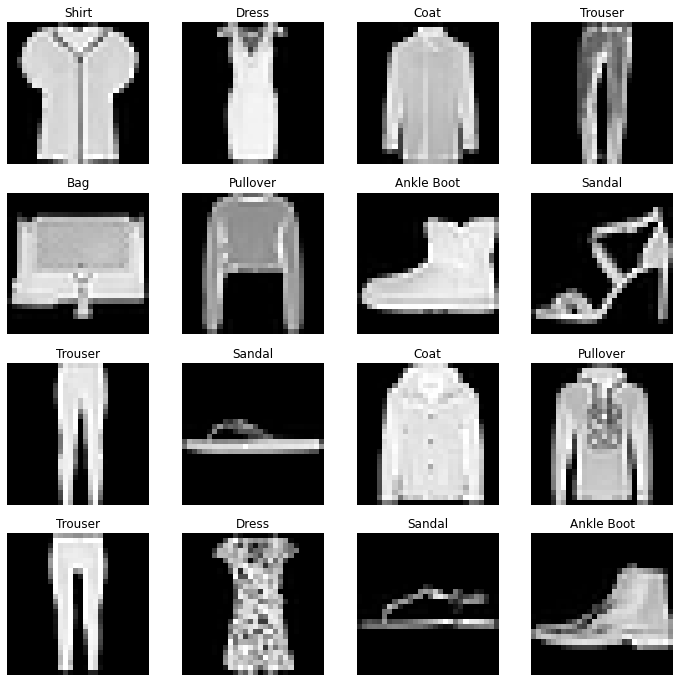

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}

figure = plt.figure(figsize=(12,12))
cols, rows = 4,4  ## 4행 4열 짜리 그림
for i in range(1, cols * rows +1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# 모델 정의 및 파라미터
from torch import nn
from torch.nn import functional as f

## 초기 세팅
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32   = nn.Conv2d(1,32,3,padding=1)
    self.conv2d_64   = nn.Conv2d(32,64,3,padding=1)
    self.max2d       = nn.MaxPool2d(2,2)
    self.conv2d_128  = nn.Conv2d(64,128,3, padding=1)
    self.conv2d_256  = nn.Conv2d(128,256,3, stride=2, padding=1)
    self.linear1     = nn.Linear(3*3*256, 256)
    self.linear2     = nn.Linear(256, 64)
    self.linear3     = nn.Linear(64, 10)
    self.batch2d1    = nn.BatchNorm2d(64)
    self.batch2d2    = nn.BatchNorm2d(256)
    self.batch2d3    = nn.BatchNorm2d(64)
    self.drop        = nn.Dropout(p=0.3)
    self.flat        = nn.Flatten()

  def forward(self,x):
    x = x.view(-1,1,28,28)            ## view는 선을 줄여준다. 1, 28,28은 지키고 -1은 알아서 한다.
    x = f.relu(self.conv2d_32(x))
    x = f.relu(self.conv2d_64(x))
    x = self.batch2d1(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = f.relu(self.conv2d_128(x))
    x = f.relu(self.conv2d_256(x))
    x = self.batch2d2(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = self.flat(x)
    x = f.relu(self.linear1(x))
    x = self.drop(x)
    x = f.relu(self.linear2(x))
    x = self.drop(x)
    x = self.batch1d(x)
    x = f.log_softmax(self.linear3(x), dim=1)
    return(x)  ## 출력값은 softmax이기 때문에 확률로 나온다.

net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


dilation
https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

- dilation은 kernel의 한 칙셀에서 다른 칙셀까지의 거리를 나타낸다.

#### nn.Linear
- 선형 계층은 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈

#### nn.ReLU
- 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계를 만든다.
- 비선형 활성화는 선형 변환 후에 적용되어 비선형성을 도입하고 신경망이 다양한 현상을 학습할 수 있도록 만든다.

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


파이토치 튜토리얼(중요한 도큐먼트를 번역해둠)
https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html


In [ ]:
# 손실함수와 옵티마이저
criterion = nn.NLLLoss()
optimiaer = torch.optim.Adam(net.parameters(), lr=0.008)

In [ ]:
# 모델 학습

## 배치수 확인
total_batch = len(train_loader)
print(total_batch)

469


#### [ 과제 ] FashionMNIST 분류 모델을 kereas로 수행하기.